This notebook plots the vehicle fleet data as output from TEAM-Kenya

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [17]:
# import technology data
technology = pd.read_csv(f'./../data/technology.csv')
technology

,TechID,ModeID,VehTypeID,MassCatID,FuelID,EngineID,TransTypeID,Availability,Final_Year,HybridFlag,spec_energ_consump,spec_energ_electric,noise_class,PurchasePrice,ExpectedLifeFactor,Capacity,AveEconLife,SecondHandImportFlag,note
0,10,1,2,4,1,10,1,1980,2000.0,0,6.57,NaN,0,5000.0,1,2.0,10,0,NaN
1,20,1,2,4,12,10,1,1995,2010.0,0,9.51,NaN,2,7000.0,1,2.0,10,0,NaN
2,25,1,2,4,12,11,1,2010,2020.0,0,8.38,NaN,2,6000.0,1,2.0,10,0,NaN
3,26,1,2,4,12,12,1,2020,NaN,0,7.18,NaN,2,5500.0,1,2.0,10,0,NaN
4,30,1,2,4,1,11,1,2000,2010.0,0,5.65,NaN,0,5000.0,1,2.0,10,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,14889,1,5,28,13,13,2,2033,2038.0,0,179.20,1.0,2,14000.0,1,2.5,10,1,NaN
2242,14890,1,5,28,13,13,2,2038,2043.0,0,153.89,1.0,2,12000.0,1,2.5,10,1,NaN
2243,14891,1,5,28,13,13,2,2043,2048.0,0,132.15,1.0,2,12000.0,1,2.5,10,1,NaN
2244,14892,1,5,28,13,13,2,2048,2053.0,0,113.48,1.0,2,12000.0,1,2.5,10,1,NaN


In [18]:
# import interface vsm data
purpose = 'scenario' # scenario/calibration
attempt = 'BASE'
scenario = 'KUJINAO'
if purpose == 'calibration':
    interface_vsm = pd.read_excel(f'./../calibration/attempts/attempt{attempt}/Interface_VSM_NumVeh.xlsx')
else:
    interface_vsm = pd.read_excel(f'./../scenarios/data-out/{scenario}/Interface_VSM_NumVeh.xlsx')
interface_vsm

,TDVSID,ScenarioID,CountryID,Year,TechID,VehCatID,NumVeh
0,0,1,9,2012,10,N,6185.808105
1,0,1,9,2012,10,S,12066.046875
2,0,1,9,2012,10,T,34365.600586
3,0,1,9,2012,70,S,1035.552965
4,0,1,9,2012,70,T,8772.739710
...,...,...,...,...,...,...,...
84733,0,1,9,2050,14891,S,3.310251
84734,0,1,9,2050,14891,T,132.794966
84735,0,1,9,2050,14892,N,32.920994
84736,0,1,9,2050,14892,S,0.182546


In [19]:
# validation

# read in numveh baseline data
numveh = pd.read_csv('./../TEAM-Kenya_data_out/numveh.csv')
numveh

,Unnamed: 0,ScenarioID,CountryID,TechID,Year,Age,TransTypeID,VehTypeID,MassCatID,EngineID,FuelID,NumVeh
0,0,1,9,70,2012,5,1,3,1,1,1,84.696857
1,1,1,9,70,2012,6,1,3,1,1,1,169.393714
2,2,1,9,70,2012,7,1,3,1,1,1,592.878000
3,3,1,9,70,2012,8,1,3,1,1,1,677.574857
4,4,1,9,70,2012,9,1,3,1,1,1,931.665429
...,...,...,...,...,...,...,...,...,...,...,...,...
177913,177913,1,9,4275,2050,16,1,8,45,7,15,0.000000
177914,177914,1,9,4275,2050,32,1,8,45,7,15,0.000000
177915,177915,1,9,4275,2050,33,1,8,45,7,15,0.000000
177916,177916,1,9,4275,2050,34,1,8,45,7,15,0.000000


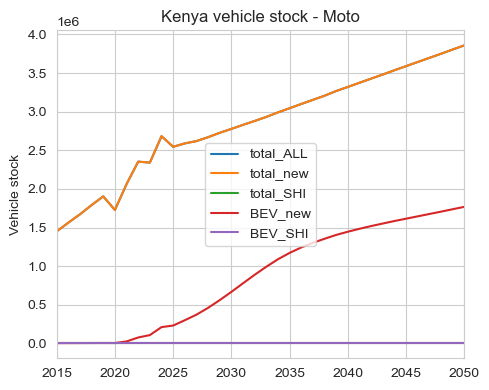

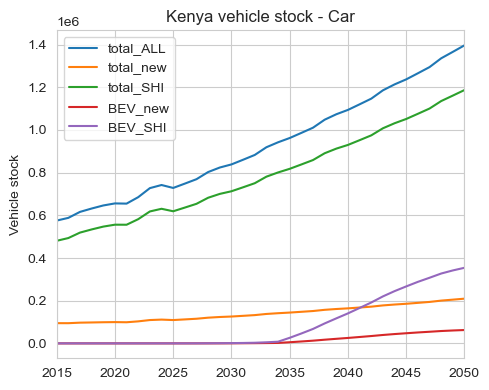

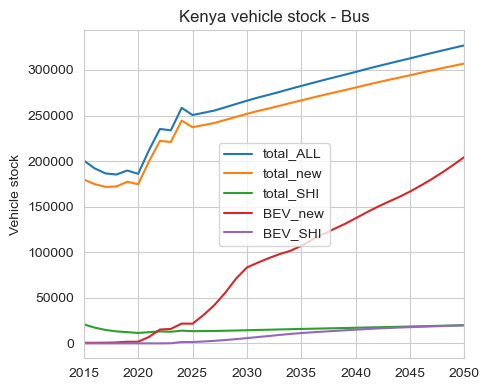

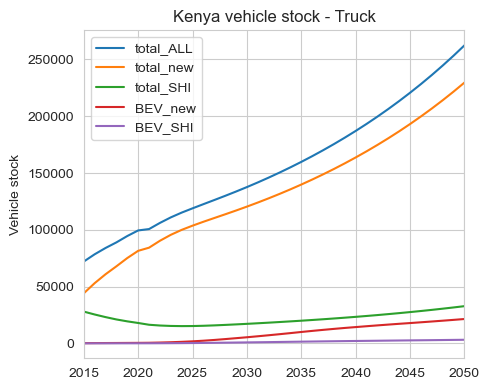

In [20]:
#  mask for SHI for given tech
years = range(2012, 2051)

# vehtype_dict = {'Moto':2, 'Car':3, 'Bus':4, 'Truck':5, 'Train':6, 'Ship':7, 'Plane':8}
# vehtype_dict = {'Car':3}
vehtype_dict ={'Moto':2, 'Car':3, 'Bus':4, 'Truck':5}
# vehtype_dict = {'Moto':2}

# plot
%matplotlib inline

# fig,axes = plt.subplots(2,4)
# pos=[]
# for i in range(2):
#     for j in range(4):
#         pos.append((i,j))
#
# pos_count=0
for vehtype in vehtype_dict:
    interface_stock_data = {'new_new':[], 'new_SHI':[], 'total_new':[], 'total_SHI':[],
                            'scrapped_new':[], 'scrapped_SHI':[], 'total_ALL':[],
                            'BEV_all':[], 'BEV_SHI':[], 'BEV_new':[]}
    for year in years:

        # just cars
        annual_Data = interface_vsm[(interface_vsm['Year'] == year) & (interface_vsm['TechID'].isin(technology[technology['VehTypeID'] == vehtype_dict[vehtype]]['TechID']))]

        # interface_stock_data['new_petrol'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 1)]['NumVeh'].sum())
        # interface_stock_data['SHI_petrol'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 1)]['NumVeh'].sum())
        # interface_stock_data['new_bev'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['FuelID'] == 12)]['NumVeh'].sum())
        # interface_stock_data['SHI_bev'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['FuelID'] == 12)]['NumVeh'].sum())

        interface_stock_data['new_new'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['VehCatID'] == 'N')]['NumVeh'].sum())
        interface_stock_data['new_SHI'].append(annual_Data[(annual_Data['TechID'] >= 9000) & (annual_Data['VehCatID'] == 'N')]['NumVeh'].sum())
        interface_stock_data['total_new'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())
        interface_stock_data['total_SHI'].append(annual_Data[(annual_Data['TechID'] >= 9000)  & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())
        interface_stock_data['scrapped_new'].append(annual_Data[(annual_Data['TechID'] < 9000) & (annual_Data['VehCatID'] == 'S')]['NumVeh'].sum())
        interface_stock_data['scrapped_SHI'].append(annual_Data[(annual_Data['TechID'] >= 9000)  & (annual_Data['VehCatID'] == 'S')]['NumVeh'].sum())
        interface_stock_data['total_ALL'].append(annual_Data[annual_Data['VehCatID'] == 'T']['NumVeh'].sum())

        interface_stock_data['BEV_all'].append(annual_Data[(annual_Data['TechID'].isin(technology[technology.FuelID==12].TechID)) & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())
        interface_stock_data['BEV_SHI'].append(annual_Data[(annual_Data['TechID'].isin(technology[technology.FuelID==12].TechID)) & (annual_Data['TechID'] > 9000) & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())
        interface_stock_data['BEV_new'].append(annual_Data[(annual_Data['TechID'].isin(technology[technology.FuelID==12].TechID)) & (annual_Data['TechID'] < 9000) & (annual_Data['VehCatID'] == 'T')]['NumVeh'].sum())


    fig, ax = plt.subplots(figsize=(5,4))

    clr_cnt = 0

    plot_keys = list(interface_stock_data.keys())
    plot_keys = ['total_ALL', 'total_new', 'total_SHI', 'BEV_new', 'BEV_SHI']
    for data in plot_keys:

        ax.plot(years, interface_stock_data[data], label=data, color=sns.color_palette()[clr_cnt])

        clr_cnt += 1

    # put a comparison on from input data
    st_year = 2012
    e_year = 2050
    initial_stock = numveh[(numveh.VehTypeID == vehtype_dict[vehtype]) & (numveh.Year == 2012)].NumVeh.sum()

    #ax.axhline(initial_stock, color='black', linestyle='--', label='initial')

    ax.set_xlim(left=st_year, right=e_year)
    ax.set_ylabel('Vehicle stock')
    ax.legend()

    plt.title(f'Kenya vehicle stock - {vehtype}')
    fig.tight_layout()

    if purpose == 'calibration':
        #fig.savefig(f'./calibration/attempts/attempt{attempt}/vehstock_{vehtype}.png')
        fig.savefig(f'./../calibration/attempts/{attempt}/vehstock_{vehtype}.png')
    elif purpose == 'scenario':

        fig.savefig(f'./../scenarios/data-out/{scenario}/vehstock_{vehtype}.png')

    # pos_count+=1